Cleaning merged league data from FBref:

In [54]:
# Import libraries:
import pandas as pd
import os
import seaborn as so
import matplotlib.pyplot as plt

Global variables and functions:

In [55]:
# Global variables:
repo_dir = os.getcwd()  # Directory of the script
merged_data_dir = os.path.join(repo_dir, "Merged Data")   # Path to the Merged Data folder
league_ids = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'GER-Bundesliga', 'ITA-Serie A'] # For league-level iteration
epl_file_path = os.path.join(merged_data_dir, "ENG-Premier League_full_merge.xlsx")

# Graph output styling from matplotlib:
plt.style.use('fivethirtyeight')

In [67]:
# Function that imports data from Github data folder:
def import_merged_data(file_path):
    df = pd.read_excel(file_path)
    return df


# Function that removes unnamed columns:
def remove_unnamed_cols(df):

    # Create list of unnamed columns:
    columns = df.columns
    unnamed_cols = [col for col in columns if "Unnamed" in col]

    # Create a new df and set index:
    new_df = (df
              .drop(columns=unnamed_cols)
              .set_index('league')
              )

    return new_df


# Function that writes the output data to an Excel file:
def make_xl(path, df, file_name):
    file_path = os.path.join(path, f'{file_name}.xlsx')
    return df.to_excel(file_path, index=True)           # Remove index=True if getting permission error

Import EPL data for preliminary cleaning and exploring:

In [34]:
# Import the EPL data for experimental cleaning:
epl_df = import_merged_data(epl_file_path)

In [ ]:
# Make a local copy of the dataframe for efficiency:
epl_df_copy = epl_df.copy(deep=True)

In [35]:
# Remove all unnamed columns and drop NaN values from the dataframe:
clean_epl_df_copy = remove_unnamed_cols(epl_df_copy).dropna(subset=['position'])
clean_epl_df_copy

,season,team,player,nationality,position,age,YOB,MP,Starts,Min,...,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1
league,,,,,,,,,,,,,,,,,,,,,
ENG-Premier League,1718,Arsenal,Aaron Ramsey,WAL,MF,26.0,1990.0,24.0,21.0,1846.0,...,42.0,25.0,17.0,0.83,0.49,42.8,23.0,19.8,0.97,0.93
ENG-Premier League,1718,Arsenal,Ainsley Maitland-Niles,ENG,"DF,MF",19.0,1997.0,15.0,8.0,914.0,...,17.0,16.0,1.0,0.10,-0.69,14.3,14.3,0.0,0.00,-0.74
ENG-Premier League,1718,Arsenal,Alex Iwobi,NGA,"MF,FW",21.0,1996.0,26.0,22.0,1830.0,...,36.0,26.0,10.0,0.49,-0.24,35.6,25.5,10.2,0.50,-0.08
ENG-Premier League,1718,Arsenal,Alex Oxlade-Chamberlain,ENG,DF,23.0,1993.0,3.0,3.0,241.0,...,4.0,7.0,-3.0,-1.12,-1.86,4.2,4.6,-0.4,-0.14,-0.74
ENG-Premier League,1718,Arsenal,Alexandre Lacazette,FRA,FW,26.0,1991.0,32.0,26.0,2202.0,...,51.0,28.0,23.0,0.94,0.94,46.9,27.4,19.5,0.80,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENG-Premier League,2223,Wolves,Rayan Aït Nouri,ALG,DF,21.0,2001.0,21.0,9.0,1076.0,...,8.0,18.0,-10.0,-0.84,-0.18,11.6,18.7,-7.1,-0.60,0.01
ENG-Premier League,2223,Wolves,Raúl Jiménez,MEX,FW,31.0,1991.0,15.0,8.0,846.0,...,7.0,18.0,-11.0,-1.17,-0.61,10.6,16.6,-6.0,-0.64,-0.04
ENG-Premier League,2223,Wolves,Rúben Neves,POR,MF,25.0,1997.0,35.0,33.0,3019.0,...,26.0,48.0,-22.0,-0.66,0.47,32.5,51.7,-19.2,-0.57,0.29


In [69]:
# Get column names:
col_names = clean_epl_df_copy.columns
col_nums = [i for i in range(0, 155)]

# Create a dictionary and convert to a pandas DF for XL:
col_names_dict = {k:v for k,v in zip(col_nums, col_names)}
columns_df = pd.DataFrame.from_dict(col_names_dict)
make_xl(path=repo_dir, df=columns_df, file_name='Merged Data Columns')

ValueError: If using all scalar values, you must pass an index

In [37]:
# Aggregate by position and get row totals:
pos_agg_eply_df = (clean_epl_df_copy
               .groupby('position')
               .aggregate({'season': 'count', 'age': 'mean', 'MP': 'mean'})
               .rename(columns={'season': 'row_total'})
               .reset_index()
               )

pos_agg_eply_df

,position,row_total,age,MP
0,DF,998,26.098196,19.309619
1,"DF,FW",25,24.000000,14.560000
2,"DF,MF",102,24.774510,19.039216
3,FW,479,25.164927,19.858038
4,"FW,DF",16,23.437500,19.312500
5,"FW,MF",315,24.187302,20.730159
6,GK,236,29.016949,19.478814
7,MF,697,25.288379,20.002869
8,"MF,DF",73,25.232877,20.575342
9,"MF,FW",265,24.615094,21.867925


<AxesSubplot: xlabel='season', ylabel='row_total'>

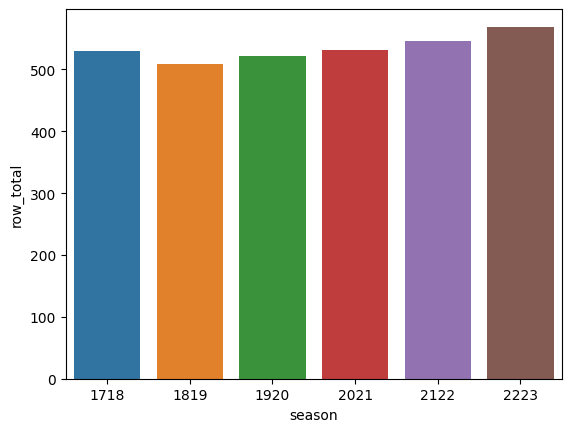

In [41]:
season_agg_eply_df = (clean_epl_df_copy
                      .groupby('season')
                      .aggregate({'position': 'count', 'age': 'mean', 'MP': 'mean'})
                      .rename(columns={'position': 'row_total'})
                      .reset_index()
                      )

# Create a line chart of player count by season:
so.barplot(x='season', y='row_total', data=season_agg_eply_df)

In [43]:
# Filter on position level:
midfield_epl_df = (clean_epl_df_copy[clean_epl_df_copy['position'].str.contains("MF")]
                   .groupby('position')
                   .aggregate({'season': 'count', 'age': 'mean', 'MP': 'mean'})
                   .rename(columns={'season': 'row_total'})
                   .reset_index()
                   )
midfield_epl_df

,position,row_total,age,MP
0,"DF,MF",102,24.774510,19.039216
1,"FW,MF",315,24.187302,20.730159
2,MF,697,25.288379,20.002869
3,"MF,DF",73,25.232877,20.575342
4,"MF,FW",265,24.615094,21.867925


Text(0, 0.5, 'Number of Players')

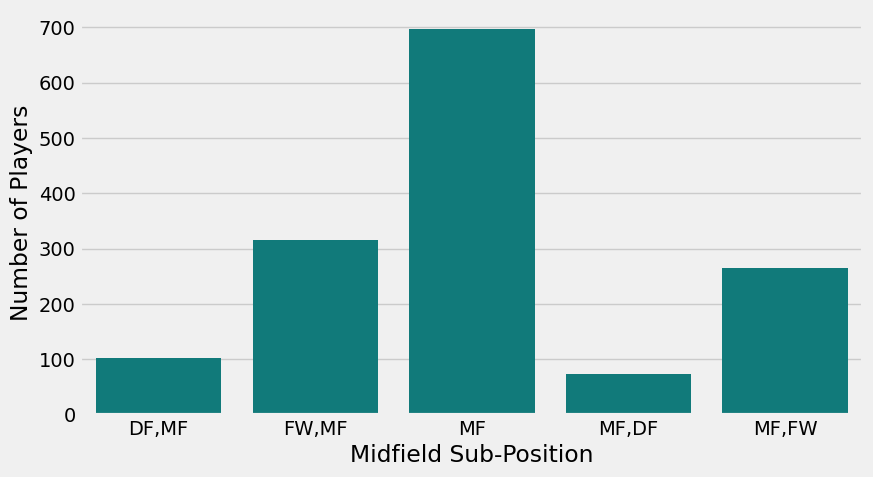

In [63]:
# Plot row totals by MIDFIELD sub-positions:
plt.figure(figsize=(9,5))
so.barplot(x='position', y='row_total', data=midfield_epl_df, color='darkcyan')
plt.xlabel('Midfield Sub-Position')
plt.ylabel('Number of Players')

Aggregate at the team level:

In [ ]:
team_agg_eply_df = (clean_epl_df_copy
                      .groupby('team')
                      .aggregate({'league': 'count', 'age': 'mean', 'MP': 'mean'})
                      .rename(columns={'league': 'row_total'})
                      .reset_index()
                      )